In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data

In [3]:
train = np.load("data/train_matrix.npy")
train_label = np.load("data/train_labels.npy")

In [4]:
test = np.load("data/test_matrix.npy")
test_labels = np.load("data/test_labels.npy")

In [5]:
# split training data into training and validtion set

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train, train_label, test_size=0.10, random_state=123) 
del train, train_label

In [7]:
# build sequential model

In [17]:
from tensorflow import keras

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = xtrain[0].shape))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(1))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 53)                0         
                                                                 
 dense_8 (Dense)             (None, 200)               10800     
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=[keras.metrics.RootMeanSquaredError()])

In [22]:
history = model.fit(xtrain, ytrain, 
          batch_size=50000, 
          epochs=30, 
          validation_data=(xvalid, yvalid))

Epoch 1/30
49/49 [==============================] - 8s 132ms/step - loss: 70.6686 - root_mean_squared_error: 8.4065 - val_loss: 27.9666 - val_root_mean_squared_error: 5.2883
Epoch 2/30
49/49 [==============================] - 6s 129ms/step - loss: 22.7324 - root_mean_squared_error: 4.7679 - val_loss: 16.2309 - val_root_mean_squared_error: 4.0288
Epoch 3/30
49/49 [==============================] - 6s 130ms/step - loss: 14.1549 - root_mean_squared_error: 3.7623 - val_loss: 11.8196 - val_root_mean_squared_error: 3.4380
Epoch 4/30
49/49 [==============================] - 7s 138ms/step - loss: 11.2759 - root_mean_squared_error: 3.3580 - val_loss: 10.2967 - val_root_mean_squared_error: 3.2088
Epoch 5/30
49/49 [==============================] - 6s 132ms/step - loss: 10.1664 - root_mean_squared_error: 3.1885 - val_loss: 9.4975 - val_root_mean_squared_error: 3.0818
Epoch 6/30
49/49 [==============================] - 7s 142ms/step - loss: 9.4695 - root_mean_squared_error: 3.0773 - val_loss: 9.17

In [23]:
loss = pd.DataFrame(history.history)
loss.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
25,7.749039,2.783710,8.327181,2.885685
26,7.716361,2.777834,7.590971,2.755172
27,7.638144,2.763719,7.580341,2.753242
28,7.496011,2.737885,7.345973,2.710346
29,7.780832,2.789414,7.346806,2.710499


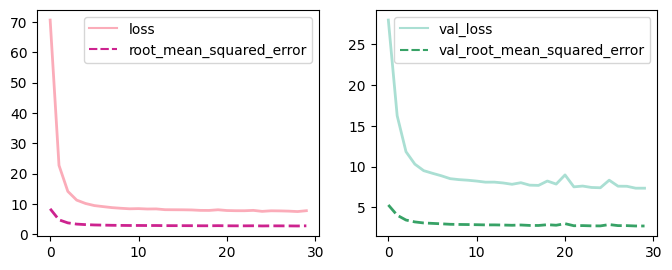

In [26]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3), dpi=100)
sns.lineplot(data=loss.loc[:,["loss","root_mean_squared_error"]], palette="RdPu",linewidth=2.0, ax=axes[0]);
sns.lineplot(data=loss.loc[:,["val_loss","val_root_mean_squared_error"]], palette="BuGn",linewidth=2.0, ax=axes[1]);

In [27]:
model.evaluate(test, test_labels)

28102/28102 [==============================] - 24s 853us/step - loss: 1143.9923 - root_mean_squared_error: 33.8230


[1143.9923095703125, 33.82295608520508]